In [111]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import photoz_utils as pz
import matplotlib.pyplot as plt
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit
import utils
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
photoz = edit.load_pickle('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/table_of_BPZ_photometric_redshifts.pkl')

In [113]:
photoz

photoz_mean,photoz_pdf [301],photoz_zbins [301]
float32,float32,float32
0.1711127,0.0 .. 0.0,0.005 .. 3.005
0.046091713,0.031847883 .. 0.0,0.005 .. 3.005
0.08217238,0.030549549 .. 0.0,0.005 .. 3.005
0.067468494,0.0079375 .. 0.0,0.005 .. 3.005
0.108543746,0.021528687 .. 0.0,0.005 .. 3.005
0.09332261,0.0 .. 0.0,0.005 .. 3.005
0.10172408,0.0 .. 0.0,0.005 .. 3.005
0.10215244,0.054912634 .. 0.0,0.005 .. 3.005
0.07129784,0.0062858267 .. 0.0,0.005 .. 3.005


In [114]:
# index=3000
# pdf = np.zeros([index, len(photoz['photoz_zbins'][0])])
# for i in range(index):
#     pdf[i,:] = np.exp(-(photoz['photoz_mean'][i]-photoz['photoz_zbins'][0])**2/(2*.1**2))
# z1 = pz.draw_z_from_pdf(pdf, photoz['photoz_zbins'][np.arange(index)], n_samples=2, use_clmm=False)
# #z2 = pz.draw_z_from_pdf(photoz['photoz_pdf'][np.arange(index)], photoz['photoz_zbins'][np.arange(index)], n_samples=2, use_clmm=False)

In [115]:
# plt.scatter(photoz['photoz_mean'][np.arange(index)], z1[:,1])
# plt.scatter(photoz['photoz_mean'][np.arange(index)], z1[:,0])
# #plt.scatter(photoz['photoz_mean'][np.arange(index)], z2[:,1])
# plt.plot(photoz['photoz_mean'][np.arange(index)], photoz['photoz_mean'][np.arange(index)])

In [116]:
z_cl = .10
photoz_quantities = pz.compute_photoz_quantities(z_cl, photoz['photoz_pdf'], photoz['photoz_zbins'], cosmo=cosmo)

/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_extraction/photoz_utils.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  if use_clmm==True:


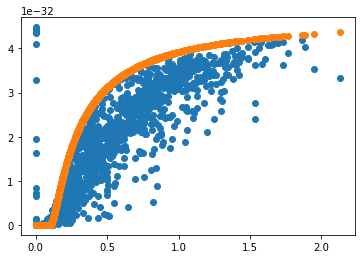

In [117]:
w_ls = 1/(photoz_quantities['sigmac_photoz']**2)
w_ls = w_ls
w_ls_true = 1/(cosmo.eval_sigma_crit(z_cl, photoz['photoz_mean'])**2)
w_ls_true = w_ls_true
plt.scatter(photoz['photoz_mean'], w_ls)
plt.scatter(photoz['photoz_mean'], w_ls_true)
#plt.yscale('log')

In [123]:
u = np.random.random(1000)*1

In [124]:
e = (1-u)/(1+u)

(array([21., 23., 22., 12., 24., 26., 20., 19., 25., 21., 20., 16., 25.,
        18., 20., 26., 14., 16., 19., 17., 22., 11., 19., 20., 19., 22.,
        18., 30., 15., 23., 23., 22., 20., 15., 26., 16., 20., 22., 24.,
        14., 16., 20., 19., 25., 26., 20., 14., 20., 15., 20.]),
 array([9.20570736e-05, 2.00827653e-02, 4.00734736e-02, 6.00641819e-02,
        8.00548902e-02, 1.00045598e-01, 1.20036307e-01, 1.40027015e-01,
        1.60017723e-01, 1.80008432e-01, 1.99999140e-01, 2.19989848e-01,
        2.39980556e-01, 2.59971265e-01, 2.79961973e-01, 2.99952681e-01,
        3.19943389e-01, 3.39934098e-01, 3.59924806e-01, 3.79915514e-01,
        3.99906223e-01, 4.19896931e-01, 4.39887639e-01, 4.59878347e-01,
        4.79869056e-01, 4.99859764e-01, 5.19850472e-01, 5.39841181e-01,
        5.59831889e-01, 5.79822597e-01, 5.99813305e-01, 6.19804014e-01,
        6.39794722e-01, 6.59785430e-01, 6.79776138e-01, 6.99766847e-01,
        7.19757555e-01, 7.39748263e-01, 7.59738972e-01, 7.79729680e-

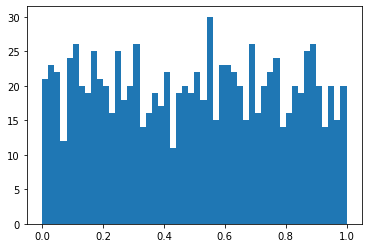

In [127]:
plt.hist(u, bins=50)